In [1]:
# библиотека для работы с датафреймами
import pandas as pd
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели
import numpy as np  # для работы с арифметическими значениями
from datetime import datetime  # для работы с датами
import matplotlib.pyplot as plt  # Для работы с визуализацией данных
import seaborn as sns  # Для работы с визуализацией данных

In [2]:
# Загрузка БД
task = pd.read_csv('main_task_new.csv')
task

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [3]:
# Для нахождения пропусков ДФ
task.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

In [4]:
# Общая информация по БД
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [5]:
# Проверка какой тип данным относится столбец
for column in task:
    print(type(column))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [6]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
#X = task.drop(['Restaurant_id', 'Rating'], axis=1)
#y = task['Rating']
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# Создаём модель
#regr = RandomForestRegressor(n_estimators=100)
# Обучаем модель на тестовом наборе данных
#regr.fit(X_train, y_train)
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
#y_pred = regr.predict(X_test)
# Данные выдаст ошибку ValueError.Ошибка возникла при обработке столбца со строковыми значениями.
# Следовательно, для обучения модели все данные должны быть переданы только в числовом формате.

In [8]:
# Пробуем по другому.Удалим все строковые значеения и заполним пропуски нулями
# А далее сделаем тоже самое:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
task = task.fillna(0)
X = task.drop(['Restaurant_id', 'Rating', 'City',
              'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis=1)
y = task['Rating']
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)
# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [10]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.42840161652236647


In [11]:
# Загрузка БД
task = pd.read_csv('main_task_new.csv')

In [12]:
# вариантов непустых значений
task['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [13]:
# Кол-во вариантов непустых значений
len(task['Price Range'].value_counts())

3

In [14]:
# Кол-во городов в датасете
len(task.City.value_counts())

31

In [15]:
# Кухня представлена в наибольшем количестве ресторанов
task['Cuisine Style'] = task['Cuisine Style'].apply(
    lambda x: str(x).replace('[', ''))
task['Cuisine Style'] = task['Cuisine Style'].apply(
    lambda x: str(x).replace(']', ''))
task['Cuisine Style'] = task['Cuisine Style'].fillna('Unknown')


def data_explode(df, col):
    df[col] = df[col].str.split(',')
    df = df.explode(col)
    return df


task['Cuisine Style'] = task['Cuisine Style'].apply(
    lambda x: str(x).replace("'", ''))
task['Cuisine Style'] = task['Cuisine Style'].apply(
    lambda x: str(x).replace("nan", 'Unknown'))
task = data_explode(task, 'Cuisine Style')
task['Cuisine Style'].value_counts()

 Vegetarian Friendly    10892
Unknown                  9283
 European                7932
Italian                  5532
 Vegan Options           4473
                        ...  
Uzbek                       1
Ukrainian                   1
Tibetan                     1
Norwegian                   1
Romanian                    1
Name: Cuisine Style, Length: 233, dtype: int64

In [16]:
# Общие кол-во типов представленных в данных
len(task['Cuisine Style'].value_counts())-1

232

In [17]:
# Среднее количество кухонь предлагается в одном ресторане
task_reset = task.reset_index()
task_reset = task_reset.iloc[:, 0:4:3]
task_reset = pd.get_dummies(task_reset, columns=['Cuisine Style'])
task_reset = task_reset.groupby(['index']).sum()
round(task_reset.mean().sum(), 1)

2.6

In [18]:
# был оставлен самый свежий отзыв
task['Reviews'] = task['Reviews'].str.split('],')
task = task.explode('Reviews')
task['Reviews'] = task['Reviews'].str.replace('[', '')
task['Reviews'] = task['Reviews'].str.replace(']', '')
Date = task['Reviews'][1::2]
Date = Date.str.split(',')
Date = Date.explode('Reviews')
Date = Date.drop_duplicates()
DATE = []
for date in Date:
    date = str(date)
    date = pd.to_datetime(date, errors='coerce')
    DATE.append(date)
Date = pd.Series(DATE)
Date.max()

<ipython-input-18-da165bf916e9>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  task['Reviews'] = task['Reviews'].str.replace('[', '')
<ipython-input-18-da165bf916e9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  task['Reviews'] = task['Reviews'].str.replace(']', '')


Timestamp('2018-02-26 00:00:00')

In [19]:
# максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана
difference_date = []
Date = Date.reset_index()
Date = Date.iloc[:, 1]
for index in range(2245):
    difference_date.append(Date[index] - Date[index+1])
difference_date = pd.Series(difference_date)
difference_date.max()

Timedelta('3708 days 00:00:00')

In [20]:
task =  pd.read_csv('main_task_new.csv')

In [21]:
# Добавлние признаков в столбец
task['Date'] = Date
task['Date'] = task['Date'].dt.strftime('%Y-%m-%d')
Reviews = task['Reviews'][0::2]
Reviews = Reviews.str.split(',')
Reviews = Reviews.explode('Reviews')
task['Differnce_date'] = difference_date

In [22]:
# Избавление от пропусков и чиска БД
task = task.drop_duplicates().reset_index()
task = task.drop(['index'], axis=1)
task['Number of Reviews'] = task['Number of Reviews'].fillna(0)
task = task.fillna('Unknown')
task['Price Range'] = task['Price Range'].replace(
    to_replace={'$$ - $$$': 'average price', '$': 'small price', '$$$$': 'big price'})
task['URL_TA'] = task['URL_TA'].str.replace('/', '')
task.isna().sum()

Restaurant_id        0
City                 0
Cuisine Style        0
Ranking              0
Rating               0
Price Range          0
Number of Reviews    0
Reviews              0
URL_TA               0
ID_TA                0
Date                 0
Differnce_date       0
dtype: int64

In [23]:
# Алгоритм выдающий в конце среднее отклонение предсказанных значений от фактических значений
X = task.drop(['Restaurant_id', 'Rating', 'City',
              'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Date', 'Differnce_date'], axis=1)
y = task['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.424536831547619


In [26]:
# Результат по БД
task

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Date,Differnce_date
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,average price,194.0,"[['Good food at your doorstep', 'A good hotel ...",Restaurant_Review-g187147-d1912643-Reviews-R_Y...,d1912643,2017-12-31,41 days 00:00:00
1,id_1535,Stockholm,Unknown,1537.0,4.0,Unknown,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",Restaurant_Review-g189852-d7992032-Reviews-Bud...,d7992032,2017-11-20,137 days 00:00:00
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,big price,688.0,"[['Catch up with friends', 'Not exceptional'],...",Restaurant_Review-g186338-d8632781-Reviews-ROK...,d8632781,2017-07-06,382 days 00:00:00
3,id_3456,Berlin,Unknown,3458.0,5.0,Unknown,3.0,"[[], []]",Restaurant_Review-g187323-d1358776-Reviews-Esp...,d1358776,2016-06-19,-568 days +00:00:00
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,average price,84.0,"[['Best place to try a Bavarian food', 'Nice b...",Restaurant_Review-g187309-d6864963-Reviews-Aug...,d6864963,2018-01-08,2 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,average price,79.0,"[['The real Italian experience!', 'Wonderful f...",Restaurant_Review-g187849-d2104414-Reviews-Ros...,d2104414,Unknown,Unknown
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,average price,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",Restaurant_Review-g187147-d1800036-Reviews-La_...,d1800036,Unknown,Unknown
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,Unknown,4.0,"[['Good by swedish standards', 'A hidden jewel...",Restaurant_Review-g189852-d947615-Reviews-Sush...,d947615,Unknown,Unknown
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,average price,70.0,"[['Underground restaurant', 'Oldest Restaurant...",Restaurant_Review-g274856-d1100838-Reviews-Hon...,d1100838,Unknown,Unknown


In [27]:
# City,Cuisine Style превращаем в dummy variables
task1 = pd.get_dummies(task, columns=['City','Cuisine Style'])
task1

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Date,Differnce_date,...,"Cuisine Style_['Wine Bar', 'Italian', 'French', 'Swiss', 'European', 'Diner']","Cuisine Style_['Wine Bar', 'Italian', 'Mediterranean', 'Greek']","Cuisine Style_['Wine Bar', 'Italian', 'Mediterranean']","Cuisine Style_['Wine Bar', 'Italian', 'Vegetarian Friendly']","Cuisine Style_['Wine Bar', 'Italian']","Cuisine Style_['Wine Bar', 'Mediterranean']","Cuisine Style_['Wine Bar', 'Scottish', 'Vegetarian Friendly']","Cuisine Style_['Wine Bar', 'Spanish']","Cuisine Style_['Wine Bar', 'Vegetarian Friendly']",Cuisine Style_['Wine Bar']
0,id_5569,5570.0,3.5,average price,194.0,"[['Good food at your doorstep', 'A good hotel ...",Restaurant_Review-g187147-d1912643-Reviews-R_Y...,d1912643,2017-12-31,41 days 00:00:00,...,0,0,0,0,0,0,0,0,0,0
1,id_1535,1537.0,4.0,Unknown,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",Restaurant_Review-g189852-d7992032-Reviews-Bud...,d7992032,2017-11-20,137 days 00:00:00,...,0,0,0,0,0,0,0,0,0,0
2,id_352,353.0,4.5,big price,688.0,"[['Catch up with friends', 'Not exceptional'],...",Restaurant_Review-g186338-d8632781-Reviews-ROK...,d8632781,2017-07-06,382 days 00:00:00,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,3458.0,5.0,Unknown,3.0,"[[], []]",Restaurant_Review-g187323-d1358776-Reviews-Esp...,d1358776,2016-06-19,-568 days +00:00:00,...,0,0,0,0,0,0,0,0,0,0
4,id_615,621.0,4.0,average price,84.0,"[['Best place to try a Bavarian food', 'Nice b...",Restaurant_Review-g187309-d6864963-Reviews-Aug...,d6864963,2018-01-08,2 days 00:00:00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,500.0,4.5,average price,79.0,"[['The real Italian experience!', 'Wonderful f...",Restaurant_Review-g187849-d2104414-Reviews-Ros...,d2104414,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0
39996,id_6340,6341.0,3.5,average price,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",Restaurant_Review-g187147-d1800036-Reviews-La_...,d1800036,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0
39997,id_1649,1652.0,4.5,Unknown,4.0,"[['Good by swedish standards', 'A hidden jewel...",Restaurant_Review-g189852-d947615-Reviews-Sush...,d947615,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0
39998,id_640,641.0,4.0,average price,70.0,"[['Underground restaurant', 'Oldest Restaurant...",Restaurant_Review-g274856-d1100838-Reviews-Hon...,d1100838,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Итоговый результат по MAE
X = task1.drop(['Restaurant_id', 'Rating',
                'Reviews', 'URL_TA', 'ID_TA', 'Date', 'Differnce_date', 'Price Range'], axis=1)
y = task1['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20509649999999996


{'whiskers': [<matplotlib.lines.Line2D at 0x1c591432a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c591441100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5914326a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5914417c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c591441b20>],
 'means': []}

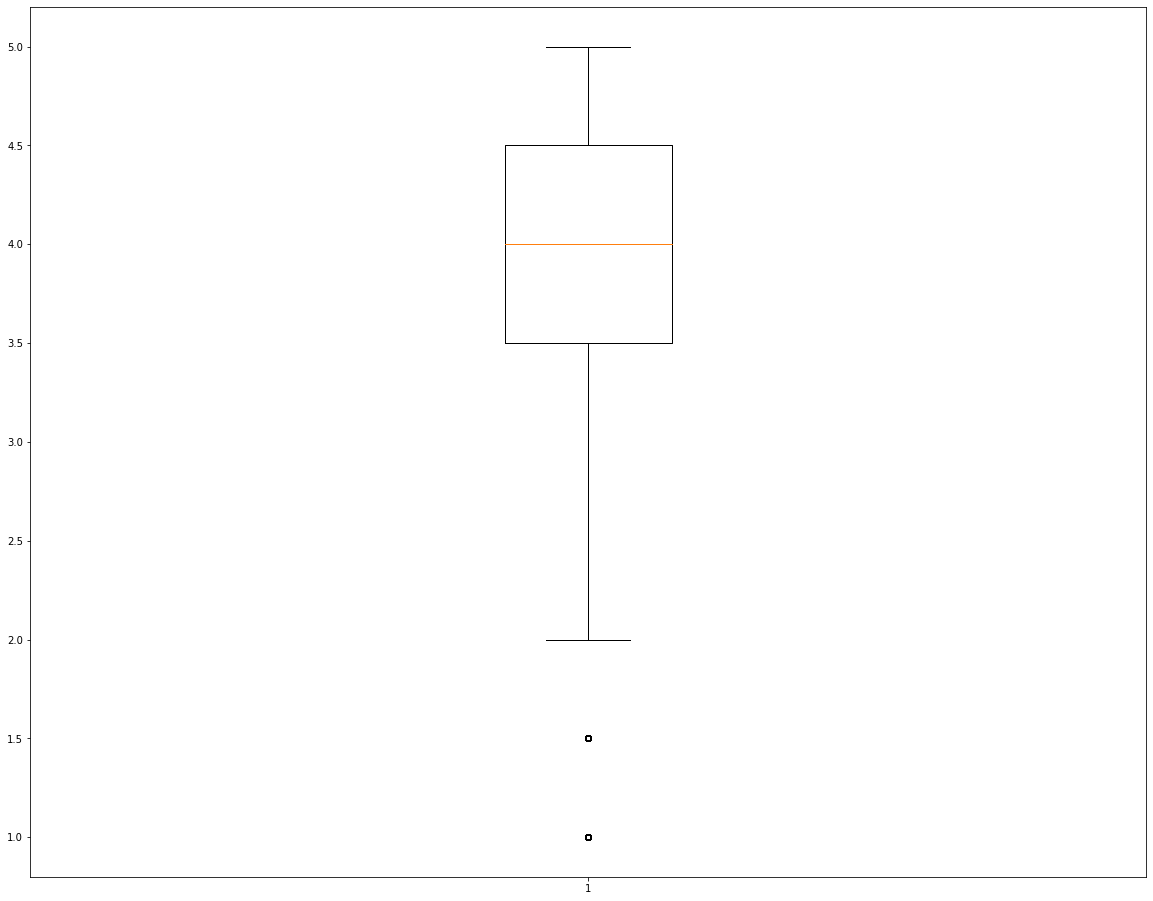

In [31]:
# Визуализация рейтинга
plt.figure(figsize=(20,16))
plt.boxplot(x='Rating',data=task1)

In [32]:
# Нахождение 25 и 75 перцентлья и границ выбрасов

perc_25 = task.Rating.quantile(0.25)
perc_75 = task.Rating.quantile(0.75)
IQR = perc_75 - perc_25

print('25 перцентель:', perc_25)
print('75 перцентель:', perc_75)
print('Границы выбрасов:', [perc_25 - 1.5*IQR, perc_75 + 1.5*IQR])

25 перцентель: 3.5
75 перцентель: 4.5
Границы выбрасов: [2.0, 6.0]


# Обнаружены выбросы до первого Q1